In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np 

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
#Loading Data

tel_1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

tel_2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [5]:
# Reading Data

print(tel_1.sample())
print("*" * 80)
print(tel_1.info())

      customerID  gender  SeniorCitizen Partner Dependents  tenure   
6263  8409-WQJUX  Female              0      No         No      25  \

     PhoneService     MultipleLines InternetService OnlineSecurity  
6263           No  No phone service             DSL             No  
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   

In [6]:
print(tel_2.sample())
print("*" * 80)
print(tel_2.info())

      customerID OnlineBackup DeviceProtection TechSupport StreamingTV   
5137  8016-NCFVO          Yes              Yes         Yes         Yes  \

     StreamingMovies        Contract PaperlessBilling     PaymentMethod   
5137             Yes  Month-to-month              Yes  Electronic check  \

      MonthlyCharges TotalCharges Churn  
5137           116.5      6382.55    No  
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   

In [7]:
df = pd.merge(tel_1,tel_2, on='customerID')

In [8]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4093,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.0,2215.25,No


In [9]:
df.shape

(7043, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
tel_1.shape[1] + tel_2.shape[1] -1 == df.shape[1]

True

In [12]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [13]:
for i in df.columns.values:
    if i in tel_1.columns.values or i in tel_2.columns.values:
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


# Data Cleaning & Analysis

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# Blank values found in the column TotalCharges

In [16]:
df.loc[df['TotalCharges'].str.contains(' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
#Removing blank values and converting TotalCharges into float
df = df.loc[~df['TotalCharges'].str.contains(' ')]
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [20]:
df.shape

(7032, 21)

In [21]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.duplicated().sum()

0

Enter one categorical variable: gender
Enter another categorical variable: InternetService


<Axes: xlabel='gender', ylabel='InternetService'>

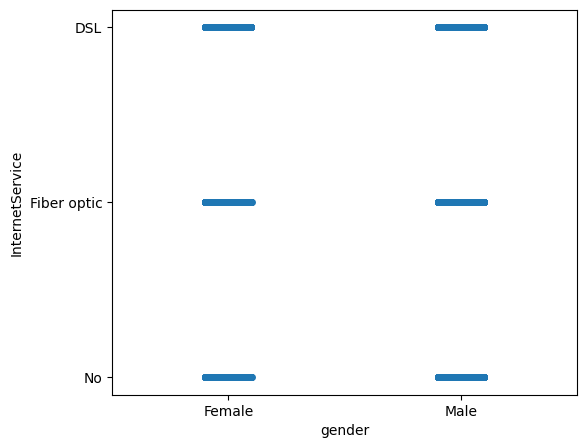

In [23]:
plt.figure(figsize = (6,5))
col1 = input('Enter one categorical variable: ')
col2 = input('Enter another categorical variable: ')

sns.stripplot(x=col1, y=col2, data=df)


The insights of categorical variables are plotted in the above graph

In [24]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [26]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if (df[i].dtype == 'object'):
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [27]:
print(numerical_features)


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [28]:
numerical_summary = df[numerical_features].describe()
numerical_summary

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [29]:
# showing precise value counts 

for col in numerical_features:
    print(f"Value counts of {col} column")
    print(df[col].value_counts(), '\n')
    print('*' * 80)

Value counts of SeniorCitizen column
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64 

********************************************************************************
Value counts of tenure column
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64 

********************************************************************************
Value counts of MonthlyCharges column
MonthlyCharges
20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1584, dtype: int64 

********************************************************************************
Value counts of TotalCharges column
TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dty

In [30]:
print(categorical_features)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [31]:
categorical_summary = df[categorical_features].describe()
categorical_summary

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [32]:
for i in categorical_features:
    print(f"Value counts in {i} column ")
    print(df[i].value_counts(), '\n')
    print('*' * 80)

Value counts in customerID column 
customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64 

********************************************************************************
Value counts in gender column 
gender
Male      3549
Female    3483
Name: count, dtype: int64 

********************************************************************************
Value counts in Partner column 
Partner
No     3639
Yes    3393
Name: count, dtype: int64 

********************************************************************************
Value counts in Dependents column 
Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

********************************************************************************
Value counts in PhoneService column 
PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

************************

Observations:

    1. A total of 1520 customers have no InternetService.
    2. The majority of customers choose a Contract of month-to-month with PaperlessBilling using the PaymentMethod of 
    electronic check.

In [33]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Univariate Analysis

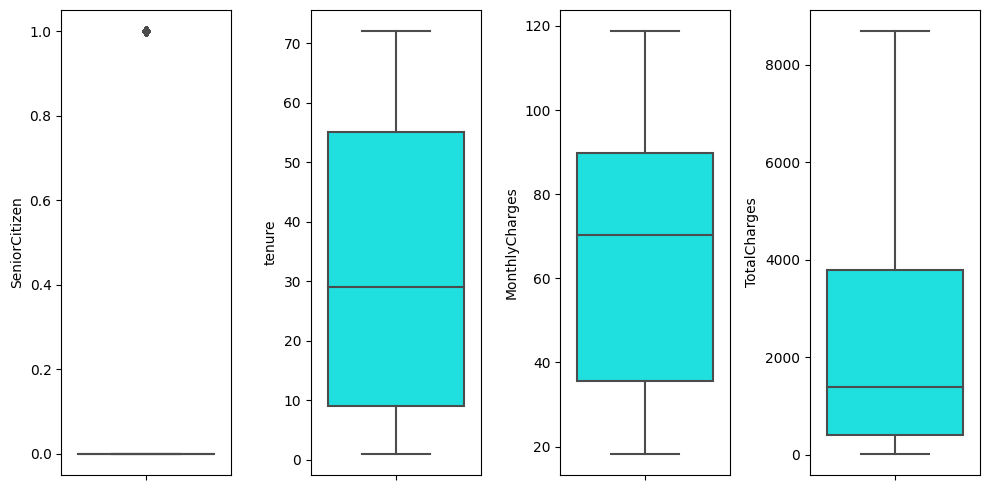

In [34]:
plt.figure(figsize=(10,5))
for i in range(0, len(numerical_features)):
    plt.subplot(1,len(numerical_features), i+1)
    sns.boxplot(y=df[numerical_features[i]], color='aqua')
    plt.tight_layout()


# KDE plot for The Distribution Form

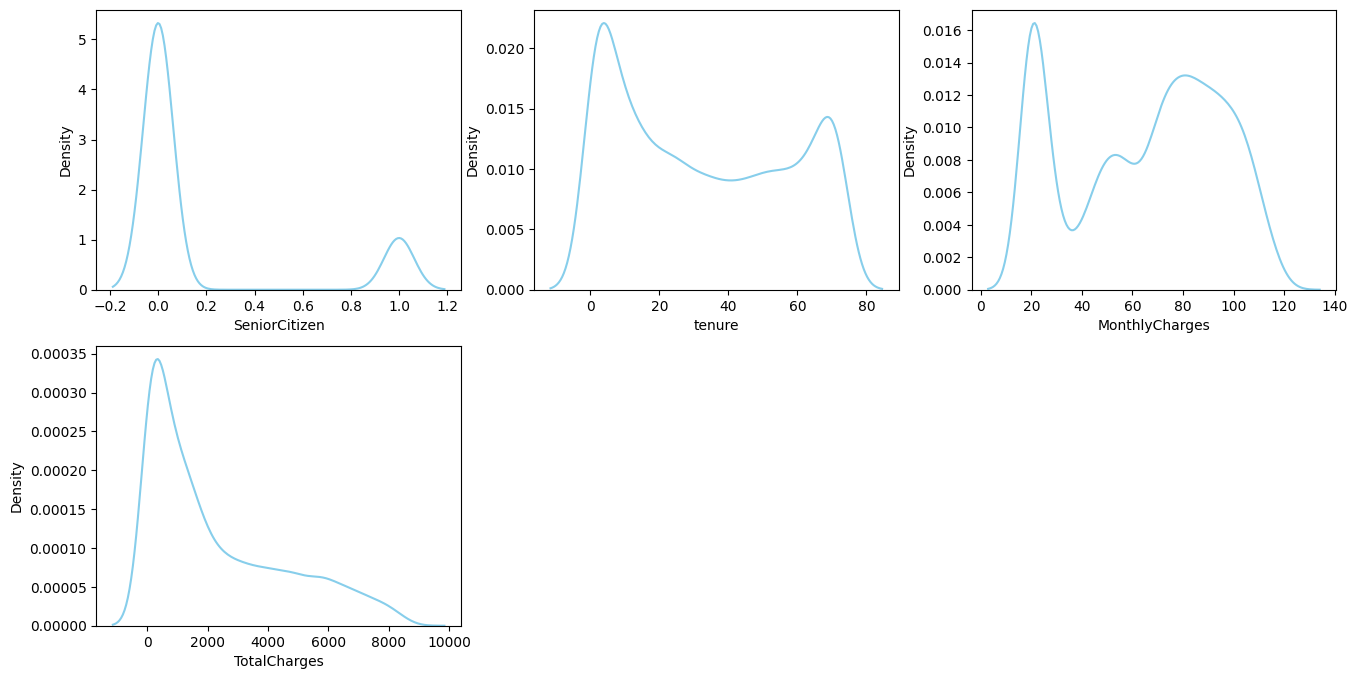

In [35]:
plt.figure(figsize=(16,8))
for i in range(0,len(numerical_features)):
    plt.subplot(2, len(numerical_features)//2 + 1, i+1)
    sns.kdeplot(x=df[numerical_features[i]], color = 'skyblue')
    plt.xlabel(numerical_features[i])

# Bivariate & Multivariate Analysis

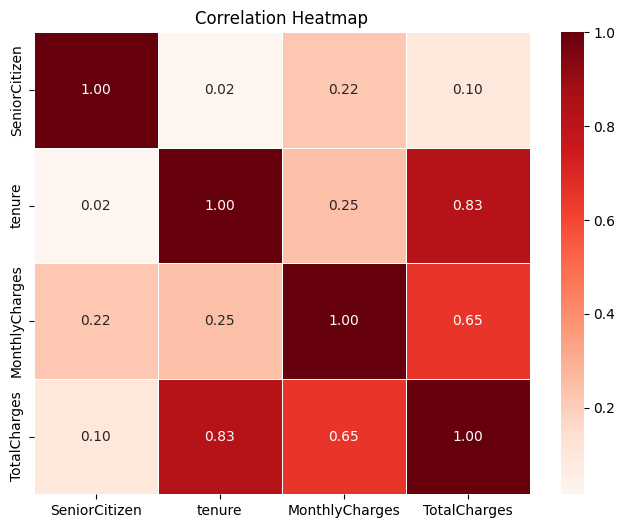

In [36]:
plt.figure(figsize=(8,6))
correlation = df.corr(numeric_only = True)
sns.heatmap(correlation, cmap="Reds", linewidths=0.5, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

There is a high correlation between TotalCharges and tenure as well as TotalCharges and MontlyCharges

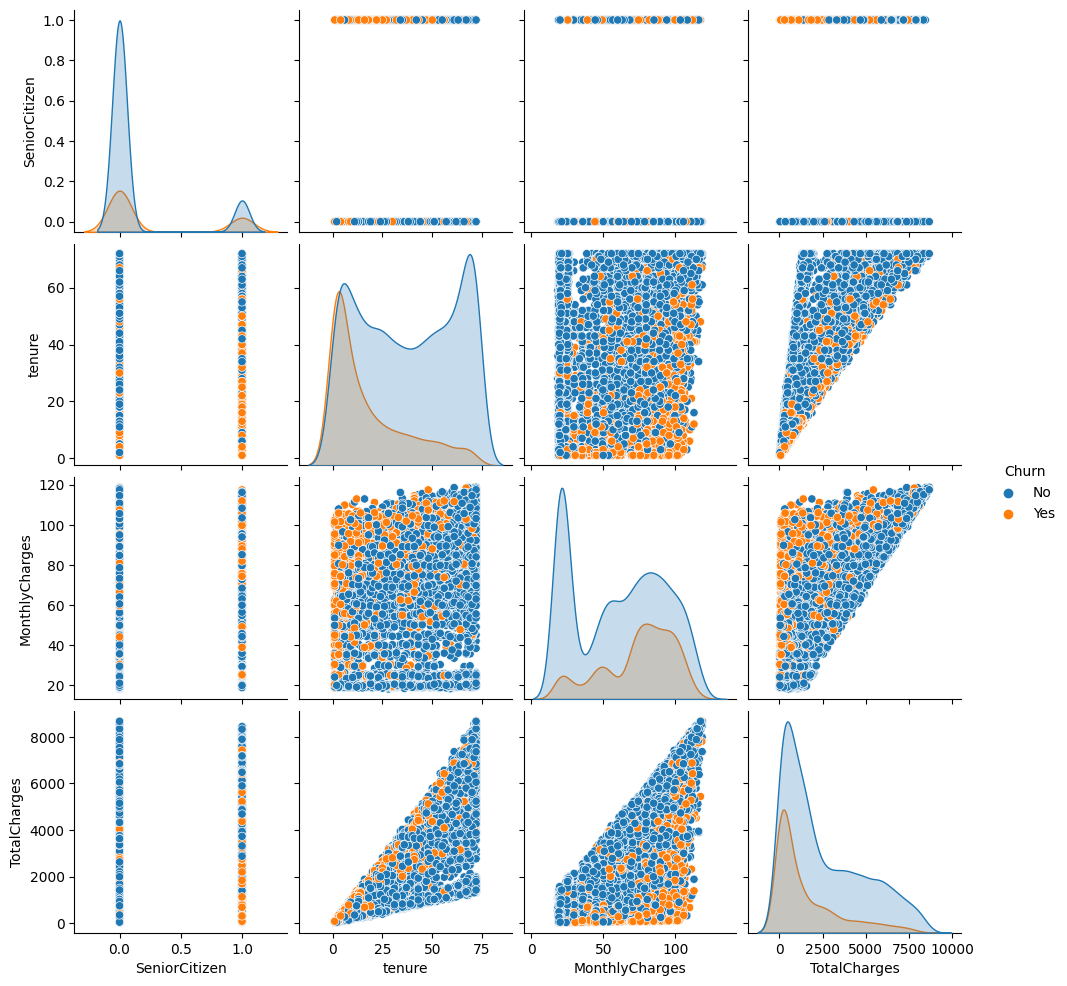

In [37]:
sns.pairplot(df,hue='Churn')

    The data is not well separated

# Data Exploration

<b>1. Does internet service affect tenure and montlycharges of a customer?

In [38]:
internet_effect = df.groupby('InternetService').agg(
    tenure_mean = ('tenure','mean'),
    MonthlyCharges_mean = ('MonthlyCharges','mean')).reset_index()
internet_effect

,InternetService,tenure_mean,MonthlyCharges_mean
0,DSL,32.889487,58.088017
1,Fiber optic,32.917959,91.500129
2,No,30.667763,21.076283


We observe that customers with Fiber optic as InternetService and higher monthlycharges incomparison to DSL and no service and
longer subsciption timer which could be due to internet stability, quality and speed of the service.

<b>2. Can partners and dependents affect their tenure, monthly and total charges?

In [39]:
relations = df.groupby(['Partner','Dependents']).agg(
    tenure_mean = ('tenure','mean'),
    Monthly_mean = ('MonthlyCharges','mean'),
    total_mean = ('TotalCharges', 'mean')).reset_index()
relations

,Partner,Dependents,tenure_mean,Monthly_mean,total_mean
0,No,No,23.303354,62.983735,1610.702439
1,No,Yes,23.986072,52.570891,1349.768802
2,Yes,No,42.709014,74.977737,3332.647157
3,Yes,Yes,41.578161,61.070805,2746.914914


According to the table above, it can be concluded that customers with partner but no dependents have the highest values for 
monthly and total charges.

<b> Using Label Encoder

In [40]:
def label(x):
    le = LabelEncoder()
    
    for i,col in enumerate(df.columns):
        if df[col].dtype == 'object' and col != 'customerID':
            df[col] = le.fit_transform(df[col])
    return df

In [41]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
df_new = label(df)

In [43]:
df_new.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


Converted object type data columns into numerical types using Label Encoder.

In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int32  
 7   MultipleLines     7032 non-null   int32  
 8   InternetService   7032 non-null   int32  
 9   OnlineSecurity    7032 non-null   int32  
 10  OnlineBackup      7032 non-null   int32  
 11  DeviceProtection  7032 non-null   int32  
 12  TechSupport       7032 non-null   int32  
 13  StreamingTV       7032 non-null   int32  
 14  StreamingMovies   7032 non-null   int32  
 15  Contract          7032 non-null   int32  
 16  PaperlessBilling  7032 non-null   int32  
 17  

# Model Building

In [45]:
#Removing unwanted columns from the data set

df_new.drop('customerID', axis =1, inplace =True)


In [46]:
df_new.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

Correlation of Churn with other attributes in the data.

In [47]:
#Splitting data into train and test sets

X = df_new.drop('Churn', axis = 1)
y = df_new['Churn']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state =40)

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<b> KNearestClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors = 15,weights = 'distance')
knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
knn.score(X_test,y_test)

0.7672985781990521

In [51]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1557
           1       0.56      0.50      0.53       553

    accuracy                           0.77      2110
   macro avg       0.70      0.68      0.69      2110
weighted avg       0.76      0.77      0.76      2110



<b> Support Vector Classifier

In [52]:
svc = SVC(random_state = 1)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
svc.score(X_test,y_test)

0.7928909952606635

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1557
           1       0.65      0.46      0.54       553

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



<b> Randomized Search CV

In [54]:
from scipy.stats import randint, uniform

estimator = GradientBoostingClassifier()

para = {
    'n_estimators' : randint(20,100),
    'max_depth' : randint(1,10),
    'learning_rate': uniform(.05, .1),
    'min_samples_split': randint(20, 40),
    'ccp_alpha': uniform(0, .7),
    'subsample': uniform(.2, .3)
}

randomsearch = RandomizedSearchCV(estimator = estimator, param_distributions=para, n_iter = 10 )
randomsearch.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E0DC786710>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E0DBE7CA90>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E0DC52ABD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E0DBBD6810>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E0DBC5BB90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E0DC786C10>})

In [55]:
print("The best score over 10 iterations : ", randomsearch.score(X_test,y_test))

The best score over 10 iterations :  0.737914691943128


In [56]:
for k,v in (randomsearch.best_params_).items():
    print("Best value for {0} is {1:.2f}".format(k,v))
    print('-'*50)

Best value for ccp_alpha is 0.24
--------------------------------------------------
Best value for learning_rate is 0.07
--------------------------------------------------
Best value for max_depth is 1.00
--------------------------------------------------
Best value for min_samples_split is 21.00
--------------------------------------------------
Best value for n_estimators is 83.00
--------------------------------------------------
Best value for subsample is 0.45
--------------------------------------------------


In [57]:
rs_pred = randomsearch.predict(X_test)
print(classification_report(y_test, rs_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1557
           1       0.00      0.00      0.00       553

    accuracy                           0.74      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.74      0.63      2110



<b> Random Forest

In [58]:
model_rf = RandomForestClassifier(n_estimators = 500)
model_rf.fit(X_train, y_train)

rf_pred = model_rf.predict(X_test)
model_rf.score(X_test,y_test)

0.7786729857819905

In [59]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1557
           1       0.60      0.47      0.53       553

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110

